In [192]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [193]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [194]:
y.shape, tx.shape
w = np.array([1,2]).T
print(np.shape(tx)[0],np.shape(y)[0])
print(compute_loss(y, tx, w))

10000 10000
2694.483365887084


# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [195]:
def compute_loss(y, tx, w, method="mse"):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************    
    error = y - np.dot(tx,w)
    if method == "mae":
        return np.sum(np.abs(error)) / np.shape(y)[0] / 2
    elif method == "mse":
        return np.inner(error,error) / np.shape(y)[0] / 2 #for MSE
    else:
        raise Exception("spam")
        #return np.sum(error**2) / np.shape(y)[0] / 2 #equivalent
    # ***************************************************


# 2 Grid Search

Fill in the function `grid_search()` below:

In [196]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    for i in range(len(w0)):
        for j in range(len(w1)):
            wtest = np.array([w0[i],w1[j]])
            losses[i,j] = compute_loss(y, tx, wtest)
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.631 seconds


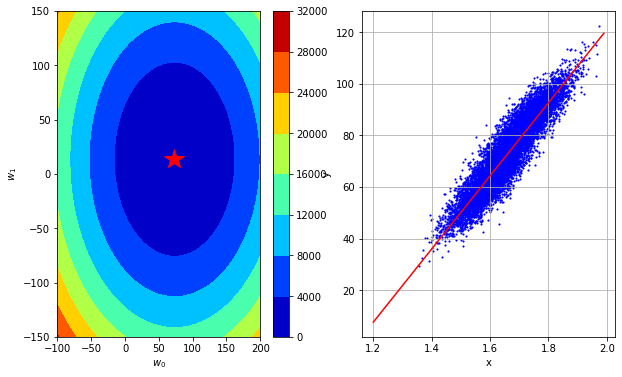

In [197]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [198]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    n = np.shape(tx)[0]
    error = y - np.dot(tx,w)
    return - np.dot(tx.T,error)/n

Please fill in the functions `gradient_descent` below:

In [201]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm with mse."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w, method="mse")
        w = w - gamma*grad
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [204]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759166, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.30246210896195, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.8783795504416, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.4102121201745, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450452, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265298, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.387363601208632, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.386020684743533, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638301, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.479

In [206]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [207]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    return compute_gradient(y, tx, w)
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma, method="mse"):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    ws = [initial_w]
    grad = 0
    losses = []
    w = initial_w
    for i in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
                grad = compute_gradient(minibatch_y, minibatch_tx,w)
        grad = grad / batch_size    
        w = w - grad * gamma
        ws.append(w)
        losses.append(compute_loss(y, tx, w))
    # ***************************************************
    return losses, ws

In [209]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.3
batch_size = 5

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.528 seconds


In [210]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Gradient Descent(0/49): loss=2829.2722244384167, w0=22.089681737919328, w1=4.342711462931178
Gradient Descent(1/49): loss=1393.3015417287002, w0=37.55245895446287, w1=7.382609486982984
Gradient Descent(2/49): loss=689.6759072009393, w0=48.37640300604335, w1=9.510538103819242
Gradient Descent(3/49): loss=344.8993462823364, w0=55.95316384214968, w1=11.000088135604619
Gradient Descent(4/49): loss=175.95883143222133, w0=61.25689642742411, w1=12.042773157854374
Gradient Descent(5/49): loss=93.17797915566496, w0=64.96950923711621, w1=12.772652673429198
Gradient Descent(6/49): loss=52.61536154015235, w0=67.56833820390068, w1=13.283568334331573
Gradient Descent(7/49): loss=32.73967890855122, w0=69.38751848064982, w1=13.641209296963233
Gradient Descent(8/49): loss=23.000594419066633, w0=70.6609446743742, w1=13.891557970805394
Gradient Descent(9/49): loss=18.2284430192192, w0=71.55234300998129, w1=14.066802042494906
Gradient Descent(10/49): loss=15.890088833293948, w0=72.17632184490624, w1=14.18

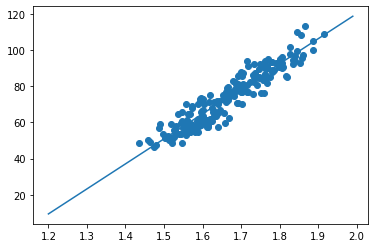

In [212]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight)
w_initial = np.array([0,0])

gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, 50, 0.3)
w_final = gradient_ws[-1]

#plot
x_plot = np.arange(1.2,2,0.01)
x_normalized = (x_plot - mean_x)/std_x #rem: on prend les mean et std des vraies donnée
plt.plot(x_plot, w_final[0] + x_normalized*w_final[1]) #que le y est fait avec x normalized


#prediction(w0, w1, mean_x, std_x):
 #   """Get the regression line from the model."""
  #  x = np.arange(1.2, 2, 0.01)
   # x_normalized = (x - mean_x) / std_x
    #return x, w0 + w1 * x_normalized

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [213]:
from random import uniform

def compute_subgradient(y, tx, w):
    """Compute the subgradient for MAE."""
    # **************************************************
    n = np.shape(tx)[0]
    error = (y - np.dot(tx,w))
    for e in error: #faire le vector set_h element wise!!!!
        if(e<0):
            e = -1
        if(e>0):
            e = 1 
        else:
          #print("non-diff point")
            e = uniform(-1.0,1.0)
                
    return - np.dot(error, tx) / n

In [214]:
#test
w=np.array([50,10])
print(compute_subgradient(y, tx, w))

[-23.63227246  -4.47570488]


In [215]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        grad = compute_subgradient(y, tx, w)
        loss = compute_loss(y, tx, w, method="mae")
        w = w - gamma*grad
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [216]:
initial_w = np.array([0,50])
sub_losses, sub_ws = subgradient_descent(y, tx, initial_w, 100, 0.7)
w_final = sub_ws[-1]

Gradient Descent(0/99): loss=36.89998894838727, w0=51.5425907218117, w1=25.13299341350609
Gradient Descent(1/99): loss=11.149111215050524, w0=67.00536793835526, w1=17.67289143755783
Gradient Descent(2/99): loss=3.73628174989343, w0=71.64420110331835, w1=15.434860844773326
Gradient Descent(3/99): loss=2.231322799325867, w0=73.03585105280729, w1=14.763451666937966
Gradient Descent(4/99): loss=2.1062016922324824, w0=73.45334603765397, w1=14.562028913587355
Gradient Descent(5/99): loss=2.1042800799821317, w0=73.57859453310797, w1=14.501602087582171
Gradient Descent(6/99): loss=2.108066108965338, w0=73.61616908174418, w1=14.483474039780615
Gradient Descent(7/99): loss=2.109251211106793, w0=73.62744144633503, w1=14.47803562544015
Gradient Descent(8/99): loss=2.1096067417492295, w0=73.63082315571229, w1=14.476404101138009
Gradient Descent(9/99): loss=2.1097134009419602, w0=73.63183766852546, w1=14.475914643847368
Gradient Descent(10/99): loss=2.1097453986997796, w0=73.63214202236942, w1=14.47

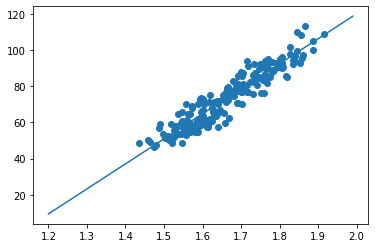

In [190]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight)
x_plot = np.arange(1.2,2,0.01)
x_normalized = (x_plot - mean_x)/std_x #rem: on prend les mean et std des vraies donnée
plt.plot(x_plot, w_final[0] + x_normalized*w_final[1]) #que le y est fait avec x normalized

In [229]:
def stochastic_subgradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    ws = [initial_w]
    grad = 0
    losses = []
    w = initial_w
    for i in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
                grad = compute_subgradient(minibatch_y, minibatch_tx,w)
        grad = grad / batch_size    
        w = w - grad * gamma
        ws.append(w)
        loss=compute_loss(y, tx, w)
        losses.append(loss)
        print("GD: loss={l}, w0={w0}, w1={w1}".format(
             l=loss, w0=w[0], w1=w[1]))
    # ***************************************************
    return losses, ws

GD: loss=2827.862962944422, w0=7.678323741965302, w1=50.232042843294465
GD: loss=2411.1292528432728, w0=15.168223934894451, w1=51.58266737876346
GD: loss=1612.044612810162, w0=25.01950677311793, w1=43.34786046440331
GD: loss=1055.9350077788263, w0=33.59459572964076, w1=36.42035315321275
GD: loss=688.488902086902, w0=40.872162768832034, w1=31.102976077419573
GD: loss=585.8745993124434, w0=44.99267436904198, w1=32.48225230246075
GD: loss=442.1965392329515, w0=48.797781223173814, w1=29.97906753955693
GD: loss=320.5286143442822, w0=52.94706934315454, w1=28.109953337261437
GD: loss=247.95500208134828, w0=55.36552951843983, w1=26.09247021178054
GD: loss=185.70104332271222, w0=57.49502404773243, w1=23.62471743035928
GD: loss=142.19072773924367, w0=59.822344045986476, w1=22.623125515062
GD: loss=113.14618787003417, w0=61.91313866631491, w1=22.32856481718694
GD: loss=88.67275590081205, w0=63.49470533240129, w1=21.352359216845716
GD: loss=57.55410742860256, w0=65.64150307764797, w1=19.3715143004

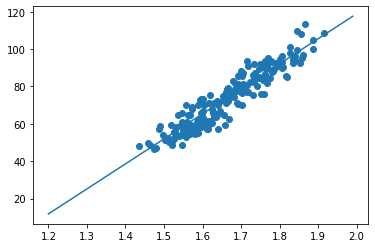

In [230]:
initial_w = np.array([0,50])
sub_losses, sub_ws = stochastic_subgradient_descent(y, tx, initial_w, batch_size=5, max_iters=100, gamma=0.7)
w_final = sub_ws[-1]

plt.scatter(height, weight)
x_plot = np.arange(1.2,2,0.01)
x_normalized = (x_plot - mean_x)/std_x #rem: on prend les mean et std des vraies donnée
plt.plot(x_plot, w_final[0] + x_normalized*w_final[1]) #que le y est fait avec x normalized